In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

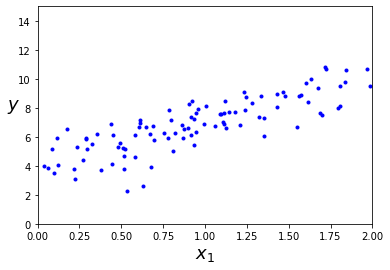

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.99983948],
       [3.01889532]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99983948],
       [10.03763012]])

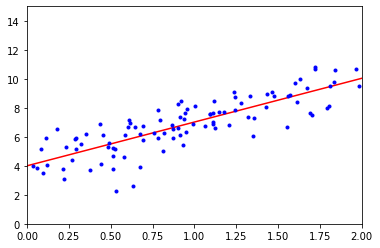

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99983948]), array([[3.01889532]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.99983948],
       [10.03763012]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.99983948],
       [3.01889532]])

# Batch Gradient Descent

In [12]:
eta = 0.1
n_iterations = 100
m = X_b.shape[0]

theta_best = np.random.randn(2,1)

for i in range(n_iterations):
    gradient = 2/m * (X_b.T.dot(X_b.dot(theta_best)-y))
    theta_best = theta_best - eta*gradient

theta_best

array([[3.99684205],
       [3.02167526]])

In [45]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    n_iterations = 1000
    plt.plot(X, y, 'b.')
    for i in range(n_iterations):
        if i < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i>0 else 'r--' 
            plt.plot(X_new, y_predict,style)
        gradient = 2/m * (X_b.T.dot(X_b.dot(theta)-y))
        theta = theta - eta*gradient
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

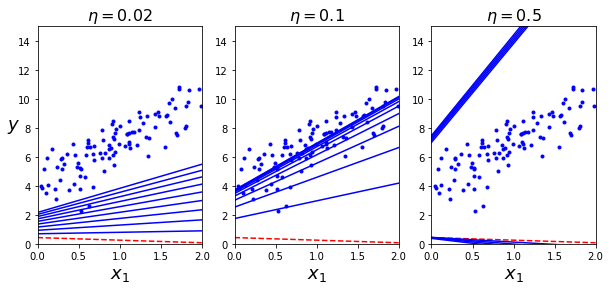

In [47]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

In [48]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

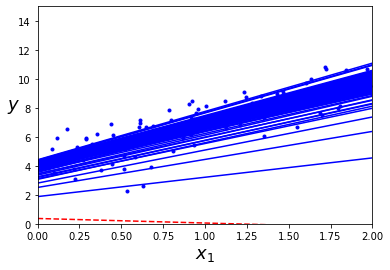

In [51]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta =np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 & i<20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i>0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradient = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradient
        theta_path_sgd.append(theta) 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                                                        
plt.show()  

In [52]:
theta

array([[4.00475431],
       [3.01061989]])

In [53]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [56]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98939624]), array([3.01101706]))